https://twitter.com/SamuelGWalters/status/1303080947009466368

## Upper bound

With $n := pn'$ and $k := n'$, we have

$$
\left(\frac{p^p}{(p-1)^{p-1}}\right)^{n'}
= \left(\frac{(n/k)^{n/k}}{(n/k-1)^{n/k-1}}\right)^k
= \frac{n^n}{k^k (n-k)^{n-k}}
$$


It remains to show

$$ \binom{pn'}{n'} = \binom{n}{k} \leq \frac{n^n}{k^k(n-k)^{n-k}} $$

proof:

\begin{align*}
\frac{n^n}{k^k (n-k)^{n-k}}
=& \frac{(k + (n-k))^n}{k^k (n-k)^{n-k}}
= \frac{\sum_{i=0}^n \binom{n}{i} k^i (n-k)^{n-i}}{k^k (n-k)^{n-k}}
\\=& \sum_{i=0}^n \binom{n}{i} k^{i-k} (n-k)^{k-i}
\\\geq&  \binom{n}{k} k^{k-k} (n-k)^{k-k}
\end{align*}

## Monotonicity (Sam's conjecture)
Let's define for convenience

$$ \texttt{funomial}(n,k) :=  \frac{n^n}{k^k(n-k)^{n-k}} $$

Then $$ \texttt{funomial}(pn,n) \binom{pn}{n}^{-1} $$ is monotonic in $p$.

In [1]:
def funomial(n,k):
    return (n+0)^n / k^k / (n-k)^(n-k)

In [2]:
n = 10
[float(funomial(p*n,n) / binomial(p*n,n)) for p in [1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2]]

[1.0,
 2.5937424601,
 3.3773107758545455,
 3.922236552606229,
 4.3362913748587415,
 4.666201962100399,
 4.937284528772184,
 5.165001327717459,
 5.359542658520983,
 5.527990368507984,
 5.675463855030419]

Because we're not actually interested in the `funomial` anymore at this point, define...

In [19]:
def binomial(n,k):
    return gamma(1+n) / gamma(1+k) / gamma(1+n-k)

def chicken(n,k):
    return funomial(n,k) / binomial(n,k)

In [20]:
%display latex
var("p n")
simplify(diff(funomial(p*n,n) / binomial(p*n,n), p))

(n*p - n)^(-n*p + n)*(n*p)^(n*p)*n^(-n + 1)*gamma(n*p - n + 1)*gamma(n + 1)*psi(n*p - n + 1)/gamma(n*p + 1) - (n*p - n)^(-n*p + n)*(n*p)^(n*p)*n^(-n + 1)*gamma(n*p - n + 1)*gamma(n + 1)*psi(n*p + 1)/gamma(n*p + 1) - (n*log(n*p - n) + n)*(n*p - n)^(-n*p + n)*(n*p)^(n*p)*gamma(n*p - n + 1)*gamma(n + 1)/(n^n*gamma(n*p + 1)) + (n*log(n*p) + n)*(n*p - n)^(-n*p + n)*(n*p)^(n*p)*gamma(n*p - n + 1)*gamma(n + 1)/(n^n*gamma(n*p + 1))

In [21]:
for n in range(20):
    print([ float(floor(100*chicken(n,k))/100) for k in range(n+1)])

[1.0]
[1.0, 1.0]
[1.0, 2.0, 1.0]
[1.0, 2.25, 2.25, 1.0]
[1.0, 2.37, 2.66, 2.37, 1.0]
[1.0, 2.44, 2.89, 2.89, 2.44, 1.0]
[1.0, 2.48, 3.03, 3.2, 3.03, 2.48, 1.0]
[1.0, 2.52, 3.13, 3.4, 3.4, 3.13, 2.52, 1.0]
[1.0, 2.54, 3.21, 3.55, 3.65, 3.55, 3.21, 2.54, 1.0]
[1.0, 2.56, 3.26, 3.66, 3.84, 3.84, 3.66, 3.26, 2.56, 1.0]
[1.0, 2.58, 3.31, 3.74, 3.98, 4.06, 3.98, 3.74, 3.31, 2.58, 1.0]
[1.0, 2.59, 3.34, 3.81, 4.1, 4.23, 4.23, 4.1, 3.81, 3.34, 2.59, 1.0]
[1.0, 2.6, 3.37, 3.87, 4.19, 4.37, 4.43, 4.37, 4.19, 3.87, 3.37, 2.6, 1.0]
[1.0, 2.61, 3.4, 3.92, 4.27, 4.48, 4.59, 4.59, 4.48, 4.27, 3.92, 3.4, 2.61, 1.0]
[1.0, 2.62, 3.42, 3.96, 4.33, 4.58, 4.72, 4.77, 4.72, 4.58, 4.33, 3.96, 3.42, 2.62, 1.0]
[1.0, 2.62, 3.44, 3.99, 4.39, 4.66, 4.84, 4.92, 4.92, 4.84, 4.66, 4.39, 3.99, 3.44, 2.62, 1.0]
[1.0, 2.63, 3.45, 4.02, 4.44, 4.73, 4.93, 5.05, 5.09, 5.05, 4.93, 4.73, 4.44, 4.02, 3.45, 2.63, 1.0]
[1.0, 2.63, 3.47, 4.05, 4.48, 4.79, 5.02, 5.16, 5.23, 5.23, 5.16, 5.02, 4.79, 4.48, 4.05, 3.47, 2.63, 1.0]
[

Define
$$
f(n,k)
:= \frac{\frac{n^n}{k^k (n-k)^{n-k}}}{\binom{n}{k}}
= \frac{n^n k! (n-k)!}{n! k^k (n-k)^{n-k}}
$$

Sam's conjecture translates to
$$ 1 < q \leq p \implies f(qn,n) \leq f(pn,n), $$
so it suffices to show that this function is grows monotonically in its first argument.

$$
\frac{f(n+1,k)}{f(n,k)}
=\frac{\frac{(n+1)^{n+1} k! (n-k+1)!}{(n+1)! k^k (n-k+1)^{n-k+1}}}
{\frac{n^n k! (n-k)!}{n! k^k (n-k)^{n-k}}}
=\frac{(1+\frac{1}{n})^n}{(1+\frac{1}{n-k})^{n-k}}
$$

As function in $n > 0$, $\left(1+\frac{1}{n}\right)^n$ is monotonically increasing (proof in next pic), so

$$ 
\frac{f(n+1,k)}{f(n,k)}
\geq 1
$$

\begin{align*}
\frac{d}{dn} n\log(1+\frac{1}{n})
=& \log(\frac{n+1}{n}) - \frac{1}{n+1} 
\\\geq& \log(\frac{n+1}{n}) + \log(1- \frac{1}{n+1})
\\=& \log(\frac{n+1}{n}) + \log(\frac{n}{n+1})
\\=& 0
\end{align*}

Hence $\log((1+\frac{1}{n})^n)$ increases monotonically in $n$.

In [22]:
[float((1+1/n)^n) for n in range(1,10)]

[2.0,
 2.25,
 2.3703703703703702,
 2.44140625,
 2.48832,
 2.5216263717421126,
 2.546499697040713,
 2.565784513950348,
 2.581174791713197]

In [23]:
float((1+1/10)^10/(1+1/7)^7)

1.0185520395365402

In [24]:
float(chicken(11,3)/chicken(10,3))

1.0185520395365402

In [25]:
chicken(0,0)

1

## Monotonicity II (Christopher's conjecture)

https://twitter.com/octonion/status/1303325301510934529


For `@octonions` generalisation we need to show that the extension of $f$ to positive real numbers is monotonically increasing in $n$, i.e.

$$ \log(n) - \psi(1+n)  \geq \log(n-k) + \psi(1+n-k) $$

or more generally that

$$ \log(x) - \psi(1+x) $$

is monotonically increasing.



In [26]:
var("n k")
hen = (n^n * gamma(k+1) * gamma(n-k+1)) / (gamma(n+1) * k^k * (n-k)^(n-k))
hen(n=10,k=3), chicken(10, 3)

(250000000/66706983, 250000000/66706983)

In [27]:
factor(diff(hen,n))

-n^n*(log(-k + n) - log(n) - psi(-k + n + 1) + psi(n + 1))*gamma(k + 1)*gamma(-k + n + 1)/(k^k*(-k + n)^(-k + n)*gamma(n + 1))

In [28]:
vorzeichen = -(log(-k+n)-log(n)-psi(-k+n+1)+psi(n+1))
vorzeichen

-log(-k + n) + log(n) + psi(-k + n + 1) - psi(n + 1)

In [29]:
diff(log(x)-psi(1+x),x)

1/x - psi(1, x + 1)

$$ \psi_1(1+x) = \psi_1(x) - \frac{1}{x^2} $$

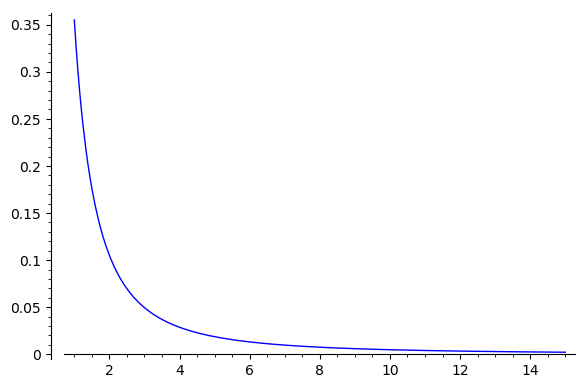

In [30]:
plot(1/x+1/x^2-psi(1,x),(x,1,15))

## Find the Semicircle


$$ \frac{f(2n,k)}{f(2n,n)} \approx \sqrt{1 - (k/n-1)^2} $$

[<matplotlib.lines.Line2D object at 0x4b022930>,
 <matplotlib.lines.Line2D object at 0x4b022850>]

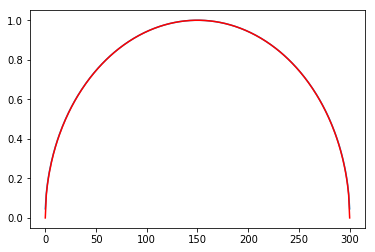

In [35]:
import matplotlib.pyplot as plt

n = 300
ran = range(n+1)
x1 = [ chicken(n, k) / chicken(n, n/2)  for k in ran]
r = n/2
x2 = [ sqrt(1 - ((k-n/2)/r)^2) for k in ran]
err = [ log(abs(x1[k] - x2[k])) for k in ran]
plt.plot(ran, x1) + plt.plot(ran, x2, color="red")

[<matplotlib.lines.Line2D object at 0x4af4b490>]

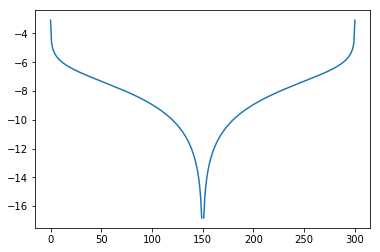

In [36]:
plt.plot(ran, err)

## Lower bound (my conjecture)

Is the following true?
$$ \frac{n^n}{k^k(n-k)^{n-k}} \leq (n+1)\binom{n}{k} $$

This is equivalent to the bound

$$ f(n,k) \leq (n+1) $$

Let's fix $n$ and optimize in $k$.

In [32]:
var("n k")
factor(diff(chicken(n,k),k))

-n^n*(log(k) - log(-k + n) - psi(k + 1) + psi(-k + n + 1))*gamma(k + 1)*gamma(-k + n + 1)/(k^k*(-k + n)^(-k + n)*gamma(n + 1))

In [33]:
diff(chicken(n,k),k)(k=n/2)

0

Assuming that $$ \log(x) - \psi(1+x) $$ is injective and monotonic (see Christopher Long's conjecture), the only extremum is found at $k = n/2$.

In [34]:
chicken(n,n/2)

n^n*gamma(1/2*n + 1)^2/((1/2*n)^n*gamma(n + 1))

So we need to bound
$$
\frac{2^n}{\binom{n}{n/2}}
= \frac{\sum_{k\geq 0} \binom{n}{k}}{\binom{n}{n/2}}
\leq \frac{(n+1) \binom{n}{n/2}}{\binom{n}{n/2}}
= (n+1)
$$

This works for integral $n$.

## Sam's limit

https://twitter.com/SamuelGWalters/status/1303080947009466368

This concludes the journey, as we found a nice way to establish

$$ \lim_{n\to\infty} \sqrt{\binom{pn}{n}} = \frac{p^p}{(p-1)^{p-1}} $$

via

$$
\frac{1}{n+1} \frac{n^n}{k^k(n-k)^{n-k}}
\leq  \binom{pn}{n}
\leq \frac{n^n}{k^k(n-k)^{n-k}}
$$